In [9]:
import requests
import io
import pandas as pd

In [30]:
house_df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [31]:
df = house_df.drop(house_df.columns[0],axis=1)

In [33]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [35]:
df.isna().mean().sort_values(ascending=False)

Sqft           0.0
Floor          0.0
TotalFloor     0.0
Bedroom        0.0
Living.Room    0.0
Bathroom       0.0
Price          0.0
dtype: float64

There are no missin values

array([[<Axes: xlabel='Sqft', ylabel='Sqft'>,
        <Axes: xlabel='Floor', ylabel='Sqft'>,
        <Axes: xlabel='TotalFloor', ylabel='Sqft'>,
        <Axes: xlabel='Bedroom', ylabel='Sqft'>,
        <Axes: xlabel='Living.Room', ylabel='Sqft'>,
        <Axes: xlabel='Bathroom', ylabel='Sqft'>,
        <Axes: xlabel='Price', ylabel='Sqft'>],
       [<Axes: xlabel='Sqft', ylabel='Floor'>,
        <Axes: xlabel='Floor', ylabel='Floor'>,
        <Axes: xlabel='TotalFloor', ylabel='Floor'>,
        <Axes: xlabel='Bedroom', ylabel='Floor'>,
        <Axes: xlabel='Living.Room', ylabel='Floor'>,
        <Axes: xlabel='Bathroom', ylabel='Floor'>,
        <Axes: xlabel='Price', ylabel='Floor'>],
       [<Axes: xlabel='Sqft', ylabel='TotalFloor'>,
        <Axes: xlabel='Floor', ylabel='TotalFloor'>,
        <Axes: xlabel='TotalFloor', ylabel='TotalFloor'>,
        <Axes: xlabel='Bedroom', ylabel='TotalFloor'>,
        <Axes: xlabel='Living.Room', ylabel='TotalFloor'>,
        <Axes: xlabel='Bat

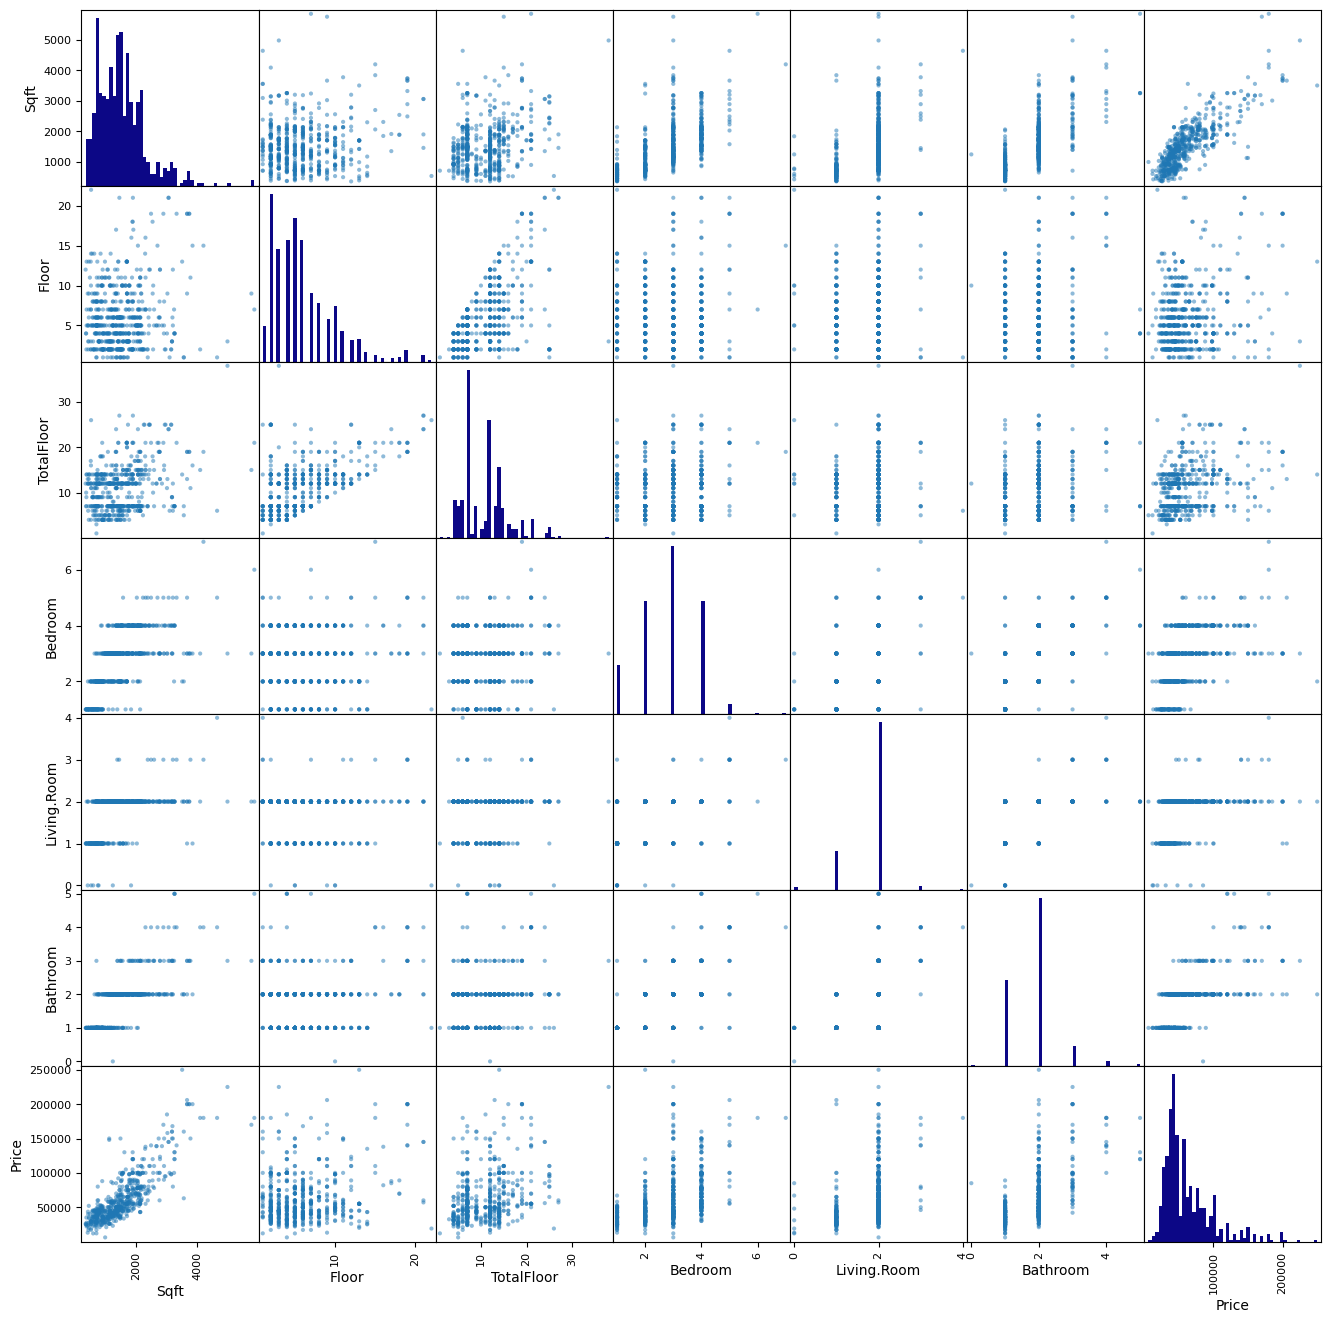

In [37]:
pd.plotting.scatter_matrix(df,hist_kwds={'bins': 50, 'color': '#0C0786'}, 
                           figsize=(16, 16))

The price seem to be proprortional to "Sqft".

It seems also that price depends on the number of beds, living rooms and bathrooms.

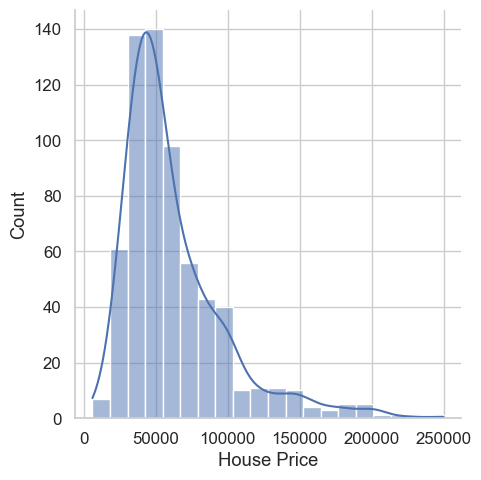

In [47]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(
    df['Price'],  kde=True, bins=20, 
).set(xlabel='House Price', ylabel='Count');

The distribution of proces is skewed to the right with a long tail 

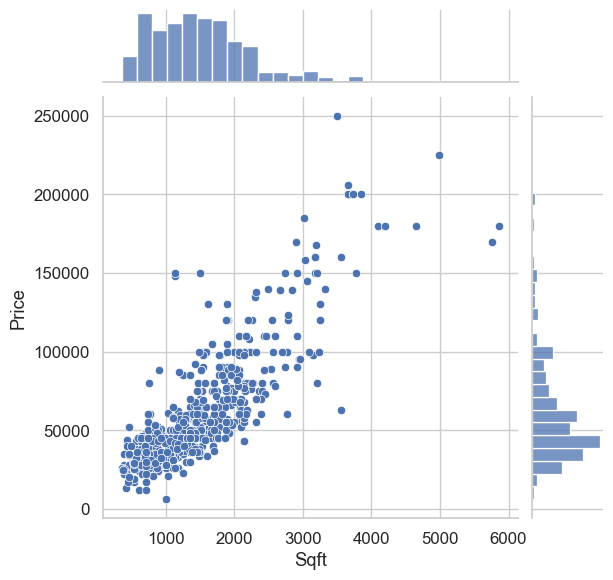

In [52]:
sns.jointplot(x=df['Sqft'], y=df['Price']);

Splitting the dataset


In [88]:
X = df[[x for x in df.columns]]
y = df[df.columns[-1]]

In [98]:
X

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
#scaling test dataset using fit found on training 
X_test = sc_x.transform(X_test)

First attempt manually setting k=5

In [118]:
model  = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)

r_squared = model.score(X_test,y_test)

In [119]:
r_squared

0.8914297285410555

Not bad...trying again manually with k=3

In [120]:
model  = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)

r_squared = model.score(X_test,y_test)
r_squared

and k=6

In [125]:
model  = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train,y_train)

r_squared = model.score(X_test,y_test)
r_squared

0.8911876723150881

It seems k=5 is optimal...but let's doing a gridsearch from 1 to 20, also changing the tyoe pf distance

In [126]:
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

In [127]:
from sklearn.model_selection import GridSearchCV

In [129]:
model = GridSearchCV(KNeighborsRegressor(), params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

THe GridSearch suggestions is with k=9 and using weights inversinversely proportional to distance

In [131]:
model.best_score_



0.9184137311541829